<a href="https://colab.research.google.com/github/JuanCervigon/master2025/blob/main/2_PCA_Breast_cancer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y datos

In [ ]:
# Importar librerías

import numpy as np
import pandas as pd

In [ ]:
# leer el dataset breast_canmcer de sklearn
from sklearn.datasets import load_breast_cancer

# La variable data es un "bunch" que contiene datos y metadatos
data = load_breast_cancer()

# Crear un array para los datos y otro para el target
X, y = load_breast_cancer(return_X_y = True)

# Crear un dataframe para los datos y otro para el target
df_X, df_y = load_breast_cancer(return_X_y = True, as_frame=True)

In [ ]:
# TO DO
# Comprobar el tipo de objetos que hemos recuperado (data, X, y, df_X, df_y. Usar la función type()
# Comprobar el número de observaciones y variables. Usar el método .shape


# Hacer un análsis de componentes principales con Sklearn

1. Estandarizar
2. Obtener las componentes principales
3. Obtener las correlaciones
4. Hacer un gráfico biplot

In [ ]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler

# Estandarizar X
estandarizador = StandardScaler()
X_std = estandarizador.fit_transform(X)

In [ ]:
# Crear un dataframe con X_std
df_X_std = pd.DataFrame(X_std, columns=data.feature_names)
df_X_std

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
# Obtener los scores, es decir la Y
# Importar librerías
from sklearn.decomposition import PCA

# Instanciar el modelo
pca = PCA(n_components = 2).fit(df_X_std)

# Crear un array con los scores
Y = pca.transform(df_X_std)

# Crear un dataframe con los scores
df_Y = pd.DataFrame(data = Y, columns = ['PC1', 'PC2'])

In [ ]:
df_Y

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [ ]:
# Obtener los valores propios
eigenvalues = pca.explained_variance_
print(f"Valores propios: {eigenvalues}")


Valores propios: [13.30499079  5.7013746 ]


In [ ]:
# Obtener los vectores propios
eigenvectors = pca.components_
print(f"Vectores propios:\n{eigenvectors}")

Vectores propios:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [ ]:
# Obtener los valores propios
eigenvalues = pca.explained_variance_
eigenvalues

array([13.30499079,  5.7013746 ])

In [ ]:
# Comprobar la dimensión de los vectores propios
eigenvectors.shape

(2, 30)

# Usar la notación de los apuntes

In [ ]:
# Escribir la matriz como en los apuntes
V = eigenvectors.T
L = np.diag(eigenvalues)


In [ ]:
# Comprobar que SV=VL
# Multiplicar la matriz de correlaciones S por los vectores propios
S = (X_std.T@X_std)/569 # matriz de correlaciones
SV = S@V
# Multiplicar los vectores propios por los valores propios
VL = V@L

In [ ]:
# Comprobar que Y = X·V
XV = X_std @ V


array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
# Calcular las correlaciones de X_std con Y_std

# Calcular las correlaciones de X_std con Y_std
df_X_std_corr = df_X_std.corrwith(df_Y['PC1'])
df_X_std_corr = pd.DataFrame(df_X_std_corr, columns=['PC1'])

df_X_std_corr['PC2'] = df_X_std.corrwith(df_Y['PC2'])
df_X_std_corr


,PC1,PC2
mean radius,0.797767,-0.557903
mean texture,0.378013,-0.142438
mean perimeter,0.829236,-0.513349
mean area,0.805393,-0.551270
mean smoothness,0.519653,0.444002
mean compactness,0.872050,0.362361
mean concavity,0.941713,0.143534
mean concave points,0.950654,-0.082943
mean symmetry,0.503535,0.454107
mean fractal dimension,0.234565,0.874523


In [ ]:
# Calcular las correlaciones de X_std con Y_std con matrices

# Raiz cuadrada de los valores propios
sqrt_L = np.sqrt(L)

# Calculo de V·sqrt_L
Vsqrt_L = V @ sqrt_L

Vsqrt_L

array([[ 0.7984687 , -0.55839357],
       [ 0.37834584, -0.14256352],
       [ 0.82996519, -0.5138004 ],
       [ 0.80610146, -0.5517546 ],
       [ 0.52011027,  0.44439233],
       [ 0.87281742,  0.36267997],
       [ 0.94254177,  0.14366015],
       [ 0.95149035, -0.08301628],
       [ 0.5039779 ,  0.45450625],
       [ 0.23477179,  0.87529247],
       [ 0.75132832, -0.25203269],
       [ 0.06357049,  0.21484945],
       [ 0.77083256, -0.21360197],
       [ 0.73998742, -0.36363751],
       [ 0.05300493,  0.48812986],
       [ 0.62152727,  0.55566858],
       [ 0.56023422,  0.4708827 ],
       [ 0.66903342,  0.31117597],
       [ 0.15501727,  0.43898401],
       [ 0.37412828,  0.66879118],
       [ 0.83164068, -0.52498708],
       [ 0.38106238, -0.10856478],
       [ 0.86316706, -0.47726074],
       [ 0.82023791, -0.52375853],
       [ 0.46671985,  0.4114206 ],
       [ 0.76634588,  0.34286534],
       [ 0.83445261,  0.23391432],
       [ 0.91513184, -0.01971626],
       [ 0.44830674,

# Hacer un gráfico biplot


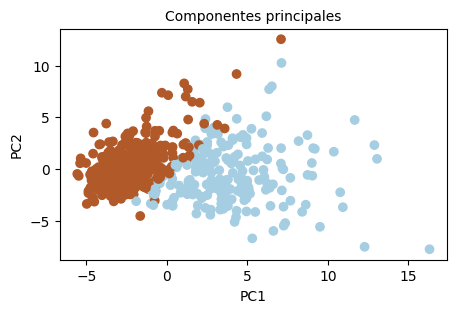

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,3))
plt.title("Componentes principales", fontsize=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(Y[:,0], Y[:,1], c=y, cmap='Paired');

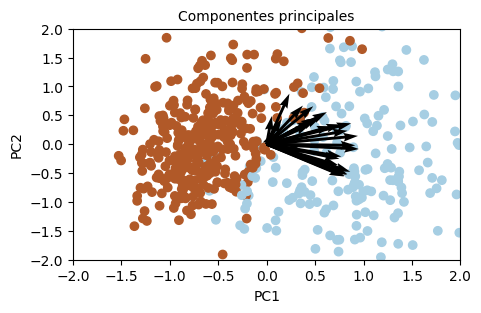

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,3))
plt.title("Componentes principales", fontsize=10)
plt.xlabel("PC1")
plt.ylabel("PC2")


Y_std = estandarizador.fit_transform(Y)

plt.scatter(Y_std[:,0], Y_std[:,1], c=y, cmap='Paired')

# Vsqrt_L es un array (30, 2). Cada fila es un flecha con origen en (0,0)
x0 = np.zeros(Vsqrt_L.shape[0])  # Array de ceros para las coordenadas de x
y0 = np.zeros(Vsqrt_L.shape[0])  # Array de ceros para las coordenadas de y

# Representación de las flechas en el gráfico
plt.quiver(x0, y0, Vsqrt_L[:, 0], Vsqrt_L[:, 1], angles='xy', scale_units='xy', scale=1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.show()

# Regresion logística

In [ ]:
# Regresion logística con todas las variables
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de y para los datos de test
y_pred = model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9824561403508771


In [ ]:
# Regresión logística con dos variables
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.3, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de y para los datos de test
y_pred = model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9707602339181286
